In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Homework # 7


Collborated with other classmates on codes.


---
<center><h1> 
    Exercise 4.6 Solution
</h1></center>

------

We start by looking at the example 3.5. Then, we will follow the explicit scheme in the book (page 119).


The given problem is 

$$f(x) = 9 + 3\cos(\pi x) + 5\cos(4\pi x)$$

It's formal solution is given by 

$$u(x,t) = \sum_k c_k e^{-(k\pi)^2 t} \cos(k\pi x)$$

As the initial conditions:

$$f(x) = \frac{c_0}{2} + \sum_k c_k \cos(k\pi x)$$

We then look to solve for coefficients:

$$c_k = 2 \langle f,\, \cos(k\pi x)\rangle)$$.

Now we derive the explicit scheme.

Let $n \geq 1$ be a given integer, and define the grid spacing in the x-direction by $\Delta x = 1/(n + 1)$. The grid points in the x-direction are given by $x_j = j\Delta x$ for $j = 0, 1,\ldots, n+1$. Similarly, we define $t_m = m\Delta t$ for integers $m \geq 0$ , where $\Delta t$ denotes the time step. Finally, we let $v_j^m$ denote an approximation of $u(x_j , t_m)$. Before we define the scheme, let us recall that we have the following approximations

$$u_t = \frac{u(x,t+\Delta t) -u(x,t)}{\Delta t} + O(\Delta t)$$,

and 

$$u_{xx} = \frac{u(x-\Delta x,t) - 2u(x,t) + u(x+ \Delta x,t)}{\Delta x^2} + O(\Delta x^2)$$.

These approximations motivate the following scheme: 

$$
\frac{v_j^{m+1} - v_j^m}{\Delta t} = \frac{v_{j-1}^m - 2v_j^m + v_{j+1}^m}{\Delta x^2}
$$

for $j=1,2,\ldots,n, m \geq 0.$

By using the given boundary conditions, we put 

$$v_0^m = v_1^m \quad \text{and} \quad v_n^m = v_{n+1}^m$$ 

for all $m \geq 0$. The scheme is initialized by 

$$v_j^0 = f(x_j)$$

for $j=1,2,\ldots,n$.

Now we have our $r=\Delta t / \Delta x^2$; then the scheme can be rewritten in a more convenient form

$$v_j^{m+1} = rv_{j-1}^m + (1-2r)v_j^m + rv_{j+1}^m$$





---
<center><h1> 
    Exercise 4.7 Solution
</h1></center>

------

Following the implicit scheme in the book (page 141)

Borrowing the notation from the explicit scheme, we apply the following approximations:

$$
u_t(x,t+\Delta t) \approx \frac{u(x,t+\Delta t) -u(x,t)}{\Delta t}
$$

and

$$
u_{xx}(x,t+\Delta t) = \frac{u(x-\Delta x,t+\Delta t) - 2u(x,t+\Delta t) + u(x+ \Delta x,t+\Delta t)}{\Delta x^2}
$$

This leads to the following scheme:

$$
\frac{v_j^{m+1} - v_j^m}{\Delta t} = \frac{v_{j-1}^{m+1} - 2v_j^{m+1} + v_{j+1}^{m+1}}{\Delta x^2} \quad \text{for} \quad j=1,2,\ldots,n, \quad m\geq0
$$

The boundary conditions imply that 

$$
v_0^m = v_1^m \quad \text{and} \quad v_n^m = v_{n+1}^m
$$

for all $m\geq 0$, and the intial condition gives

$$v_j^0 = f(x_j)$$

for $j=1,2,\ldots,n$.

In order to write this scheme in a more convenient form, we introduce the vector $v^m \in \mathbb{R}^n$ with components $v^m = (v_1^m,\ldots, v_n^m)^T$. Then we observe that the scheme can be written as 

$$(I + \Delta tA)v^{m+1} = v^m \quad , \quad m \geq 0$$

where $I \in \mathbb{R}^{n,n}$ is the identity matrix, and where the matrix $A \in \mathbb{R}^{n,n}$ is given by

$$
A = \frac{1}{(\Delta x)^2} 
    \begin{bmatrix}
    1 & -1 & 0 & \ldots & 0 \\
    -1 & 2 & -1 & \ddots & \vdots \\
    0 & \ddots & \ddots & \ddots & 0 \\
    \vdots & \ddots & -1 & 2 & -1 \\
    0 & \ldots & 0 & -1 & 1
    \end{bmatrix}
$$

In order to compute numerical solutions based on this scheme, we have to solve linear systems of the form $(I + \Delta tA)v^{m+1} = v^m$ at each time step. Hence, it is important to verify that the matrix $(I + \Delta tA)$ is nonsingular such that $v^{m+1}$ is uniquely determined by $v^m$

Now we consider $\boldsymbol{b} = \begin{bmatrix} b_1 & b_2 & \ldots & b_{n} \end{bmatrix}^T \in \mathbb{R}^{n}$ and observe that

$$
\boldsymbol{b}^TA\boldsymbol{b} = \begin{bmatrix} b_1 & b_2 & \ldots & b_{n} \end{bmatrix}
    \begin{bmatrix}
    1      & -1     & 0      & \ldots & 0 \\
    -1     & 2      & -1     & \ddots & \vdots \\
    0      & \ddots & \ddots & \ddots & 0 \\
    \vdots & \ddots & -1     & 2      & -1 \\
    0      & \ldots & 0      & -1     & 1 
    \end{bmatrix} 
    \begin{bmatrix}
    b_1 \\
    b_2 \\
    \vdots \\
    b_{n} 
    \end{bmatrix} \\
$$

$$
    \begin{bmatrix} b_1 & b_2 & \ldots & b_{n}
    \end{bmatrix}
    \begin{bmatrix}
    b_1 - b_2 \\
    -b_1 + 2b_2 - b_3 \\
    \vdots \\
    -b_{n-2} + 2b_{n-1} - b_{n} \\
    -b_{n-1} + b_{n}
    \end{bmatrix} 
$$


$$=(b_1 - b_2)^2 + (b_2 - b_3)^2 + \ldots (b_{n-1} - b_{n})^2 \geq 0$$

Following the proof of Lemma 4.1 in the book, we need to prove that $(I + \Delta tA)$ is symmetric and positive definite for all mesh parameters.

We can see that the matrix $(I+\Delta tA)$ is obviously symmetric because $A$ is symmetric. Moreover, the eigenvalues of $(I + \Delta tA)$ are of the form $1+\Delta ty$, where y corresponds to eigenvalues of $A$. However, the eigenvalues of $A$, which are given by (4.12 in page 125), are all positive. Therefore, all the eigenvalues of $(I + \Delta tA)$ are positive and hence this matrix is positive definite. Since $(I + \Delta tA)$ is symmetric and positive definite, it follows from proposition 2.4 in the book that the system has a unique solution. Then, we have the implicit scheme.







In [6]:

def f(x):
    return 9 + 3*np.cos(np.pi*x) + 5*np.cos(4*np.pi*x)

def u_exact(x,t):
    return 9 + 3*np.exp(-np.pi**2*t)*np.cos(np.pi*x) + 5*np.exp(-16*np.pi**2*t)*np.cos(4*np.pi*x)

def makeA(n,dx,ptype='N'): 
    A = np.zeros((n+2,n+2))
    np.fill_diagonal(A,-2)
    A += np.diag(np.ones(n+1),k=1)
    A += np.diag(np.ones(n+1),k=-1)
    if ptype == 'N' or ptype == 'Neumann':  
        A[0,1] = 2.0 
        A[n+1,n] = 2.0
    elif ptype == 'D' or ptype == 'Dirichlet':
        A[0,:] = 0
        A[n+1,:] = 0
    A *= 1/dx**2
    return A

def FD(n, f, r, t_max, mode='implicit', ptype='N'):
    '''
    mode = 'ex' or 'explicit', 'implicit' is anything else you pass it (including nothing)
    '''
    x = np.linspace(0,1,n+2) 
    dx = x[1]-x[0]  
    dt = r*dx**2    
    t = 0 
    v = f(x) 
    A = makeA(n, dx, ptype) 
    if mode=='explicit' or mode == 'ex':  
        B = np.eye(n+2) + dt*A 
    elif mode == 'crank' or mode == 'cr': 
        B = np.dot( np.linalg.inv( np.eye(n+2) - dt/2.0*A), np.eye(n+2) + dt/2.0*A)
    else: 
        B = np.linalg.inv( np.eye(n+2) - dt*A) 
    while t < t_max:
        v = np.dot(B,v) 
        t += dt
    return v, t 


	Table - Sup norm of Errors

\Delta x |  	 0.1 	 0.05
--------------------------------------
t = 0.01 |  7.2636e-01 2.0659e-01
t = 0.01 |  3.5677e-02 9.0311e-03


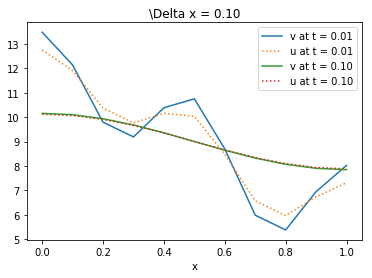

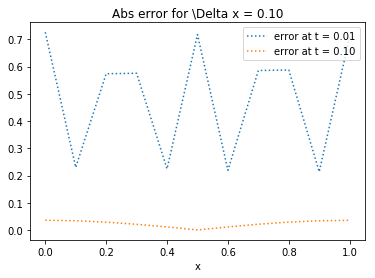

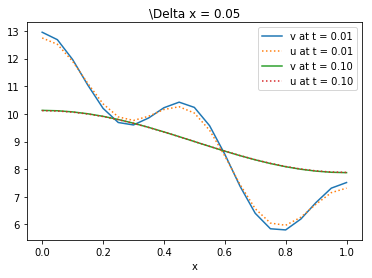

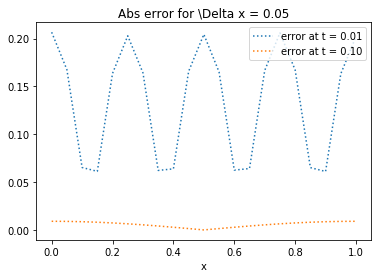

In [10]:
mesh = [9,19]
t_max_vals = [0.01, 0.1]
r = 1./2 
dt = np.array([ r*1./(n+1)**2 for n in mesh])

err = []
ct = 0 
for n in mesh:
    for t_max in t_max_vals:
        x = np.linspace(0,1,n+2)
        v, final_t = FD(n, f, r, t_max, mode='im')
        u = u_exact(x, final_t)
        
        plt.figure(ct)
        plt.plot(x, v, label='v at t = %.2f'%t_max)
        plt.plot(x, u, ':',label='u at t = %.2f'%t_max)
        plt.legend(loc='upper right')
        plt.title('\Delta x = %.2f'%(x[1]-x[0]))
        plt.xlabel('x')
        
        plt.figure(ct+2)
        plt.plot(x, np.abs(u-v), ':',label='error at t = %.2f'%t_max)
        plt.legend(loc='upper right')
        plt.title('Abs error for \Delta x = %.2f'%(x[1]-x[0]))
        plt.xlabel('x')
        
        err.append( np.max(np.abs(u - v)) ) 
    ct += 1
err = np.array(err)
print ('\n\tTable - Sup norm of Errors\n')
print ('\Delta x |  \t 0.1 \t 0.05' )
print ('--------------------------------------')
print ('t = 0.01 |  %1.4e %1.4e'%(err[0], err[2]))
print ('t = 0.01 |  %1.4e %1.4e'%(err[1], err[3]))


We can see that explicit scheme has lower absolute error than implicit scheme. 

---
<center><h1> 
    Exercise 4.20 Solution
</h1></center>

------

## 4.20(a)

The approximation for $u_t(x,t) \approx \frac{u(x,t+\Delta t)-u(x,t)}{\Delta t},$ is just a forward Euler finite difference in time. 

The approximation for $v_x(x,t) \approx \frac{v(x+\Delta x/2,t)-v(x-\Delta x/2,t)}{\Delta x}$ is discretized with a centered finite difference in space. 



## 4.20(b)
We have $v(x,t) = \alpha(u(x,t)) u_x(x,t)$. Then we have the local approximation with Taylor's Theorem

$$u(x + \Delta x/2, t) = u^\prime(x,t) + \mathcal{O}(\Delta x/2)$$

Using the Taylor series we approximate $\alpha$ and we have

$$
\alpha( u(x+\Delta x/2, t) ) = \alpha ( u(x + \Delta x,t) ) + \mathcal{O}(\Delta x/2)
$$

We then use a local linear approximation and we have

$$
\alpha( u(x+\Delta x/2, t) ) = \alpha ( u(x,t)) + \mathcal{O}(\Delta x/2) ) = \alpha ( u(x,t) ) + \mathcal{O} (\Delta x/2)
$$


We add the two expressions and multiply it by $u(x)$ to get

$$2 \alpha( u(x+\Delta x/2, t) )u_x \approx (\alpha ( u(x + \Delta x,t) ) + \alpha ( u(x,t)))u_x$$

We then divide by 2 and plug in the forward finite difference for $u_x$ and we have   

$$v(x+\Delta x/2,t) \approx \frac{1}{2}(\alpha(u(x+\Delta x,t))+\alpha(u(x,t)))\frac{u(x+\Delta x,t)-u(x,t)}{\Delta x}$$


## 4.20(c)

Let start by using the approximation

$$v_x(x,t) \approx \frac{v(x+\Delta x, t) - v(x-\Delta x,t)}{\Delta x}$$ 

We have the following 

$$v(x+\Delta x/2,t) \approx (\alpha^m_{j+1/2}) (\frac{v^m_{j+1} - v_j^m}{\Delta x}) $$

and

$$\quad v(x-\Delta x/2,t) \approx (\alpha^m_{j-1/2}) \frac{v^m_{j} - v_{j-1}^m}{\Delta x} $$

Combining these two above expression will give us what we want.




